In [6]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import linregress
from scipy.stats import linregress

In [20]:
# Import the request library.
import requests

# Import the API key.
from config import weather_api_keys
#weather_api

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
# api.openweathermap.org/data/2.5/weather?q={city name}&appid=
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9d8f7c112632932f862961cceb1956eb


In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | tautira
Processing Record 4 of Set 1 | bandarbeyla
Processing Record 5 of Set 1 | muros
Processing Record 6 of Set 1 | tacuati
Processing Record 7 of Set 1 | tafresh
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | poya
Processing Record 12 of Set 1 | roald
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | bouloupari
Processing Record 15 of Set 1 | stranraer
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | waingapu
Processing Record 19 of Set 1 | lar
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | new norfolk
Processing Record 24 of Set 1 | lebu
Processi

Processing Record 38 of Set 4 | nago
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | araouane
Processing Record 41 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 42 of Set 4 | tarakan
Processing Record 43 of Set 4 | hambantota
Processing Record 44 of Set 4 | walvis bay
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | lukulu
Processing Record 47 of Set 4 | soto
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | alofi
Processing Record 50 of Set 4 | georgetown
Processing Record 1 of Set 5 | namangan
Processing Record 2 of Set 5 | sechura
Processing Record 3 of Set 5 | kieta
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | big spring
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | alta floresta
Processing Record 8 of Set 5 | kirakira
Processing Record 9 of Set 5 | baruun-urt
Processing Record 10 of Set 5 | honningsvag
Processing Record 11 of Set 5 | gui

Processing Record 30 of Set 8 | buraydah
Processing Record 31 of Set 8 | cockburn town
Processing Record 32 of Set 8 | poitiers
Processing Record 33 of Set 8 | lujan
Processing Record 34 of Set 8 | man
Processing Record 35 of Set 8 | shirokiy
Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | bestobe
Processing Record 38 of Set 8 | san jose
Processing Record 39 of Set 8 | moyale
Processing Record 40 of Set 8 | hobyo
Processing Record 41 of Set 8 | nome
Processing Record 42 of Set 8 | douglas
Processing Record 43 of Set 8 | ponta delgada
Processing Record 44 of Set 8 | alausi
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | tabou
Processing Record 47 of Set 8 | samana
Processing Record 48 of Set 8 | saskylakh
Processing Record 49 of Set 8 | yurya
City not found. Skipping...
Processing Record 50 of Set 8 | tateyama
Processing Record 1 of Set 9 | narsaq
Processing Record 2 of Set 9 | yar-sale
Processing Record 3 of Set

Processing Record 19 of Set 12 | boyolangu
Processing Record 20 of Set 12 | klyuchi
Processing Record 21 of Set 12 | mandera
Processing Record 22 of Set 12 | tigil
Processing Record 23 of Set 12 | hobbs
Processing Record 24 of Set 12 | maniitsoq
Processing Record 25 of Set 12 | ulaangom
Processing Record 26 of Set 12 | namatanai
Processing Record 27 of Set 12 | mehamn
Processing Record 28 of Set 12 | karratha
Processing Record 29 of Set 12 | shache
Processing Record 30 of Set 12 | krasnogorodsk
Processing Record 31 of Set 12 | smithers
Processing Record 32 of Set 12 | rapid valley
Processing Record 33 of Set 12 | mae sot
Processing Record 34 of Set 12 | lakes entrance
Processing Record 35 of Set 12 | la ligua
Processing Record 36 of Set 12 | graaff-reinet
Processing Record 37 of Set 12 | soyo
Processing Record 38 of Set 12 | naryan-mar
Processing Record 39 of Set 12 | kissidougou
Processing Record 40 of Set 12 | san quintin
Processing Record 41 of Set 12 | sinnamary
Processing Record 4

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.31,75,2,16.46,PF,2021-03-28 13:12:31
1,Portland,45.5234,-122.6762,45.00,81,75,8.05,US,2021-03-28 13:12:22
2,Tautira,-17.7333,-149.1500,77.00,78,20,2.30,PF,2021-03-28 13:12:32
3,Bandarbeyla,9.4942,50.8122,83.05,58,88,10.80,SO,2021-03-28 13:12:32
4,Muros,42.7762,-9.0603,73.00,44,0,7.00,ES,2021-03-28 13:12:32
5,Tacuati,-23.4500,-56.5833,70.65,95,100,3.00,PY,2021-03-28 13:12:32
6,Tafresh,34.6920,50.0130,47.75,19,0,8.57,IR,2021-03-28 13:12:33
7,Atuona,-9.8000,-139.0333,80.89,72,100,18.45,PF,2021-03-28 13:08:51
8,Torbay,47.6666,-52.7314,27.00,86,90,14.97,CA,2021-03-28 13:12:33
9,Poya,-21.3500,165.1500,77.23,83,10,6.15,NC,2021-03-28 13:12:33


In [27]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-03-28 13:12:31,-23.1203,-134.9692,78.31,75,2,16.46
1,Portland,US,2021-03-28 13:12:22,45.5234,-122.6762,45.00,81,75,8.05
2,Tautira,PF,2021-03-28 13:12:32,-17.7333,-149.1500,77.00,78,20,2.30
3,Bandarbeyla,SO,2021-03-28 13:12:32,9.4942,50.8122,83.05,58,88,10.80
4,Muros,ES,2021-03-28 13:12:32,42.7762,-9.0603,73.00,44,0,7.00
...,...,...,...,...,...,...,...,...,...
589,Medicine Hat,CA,2021-03-28 13:10:04,50.0501,-110.6683,44.01,61,1,11.50
590,Tahta,EG,2021-03-28 13:14:50,26.7693,31.5021,75.20,27,0,20.71
591,Indi,IN,2021-03-28 13:14:50,17.1667,75.9667,98.29,13,9,9.78
592,Nova Olimpia,BR,2021-03-28 13:14:50,-14.7972,-57.2881,81.93,67,5,2.75


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

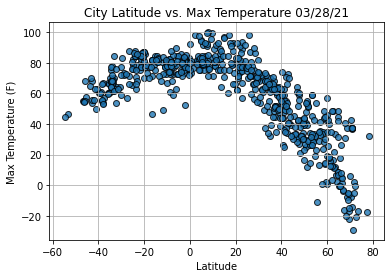

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

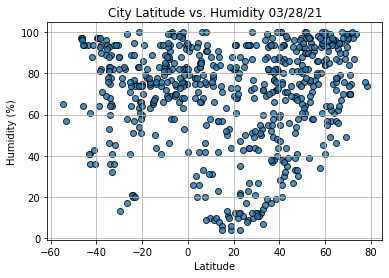

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

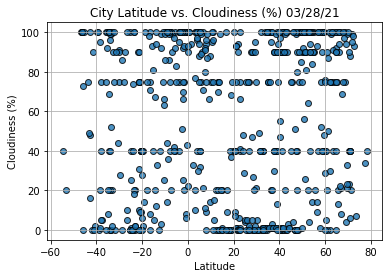

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

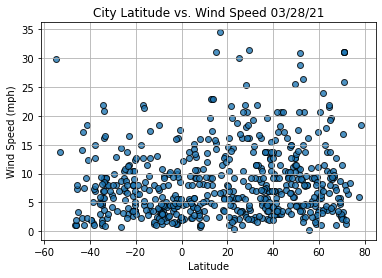

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


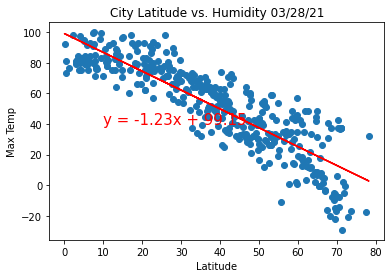

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


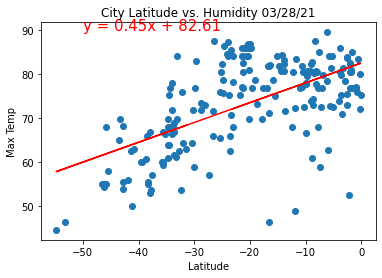

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

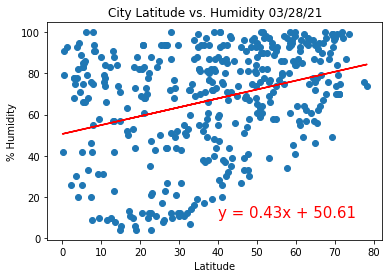

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,                        
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

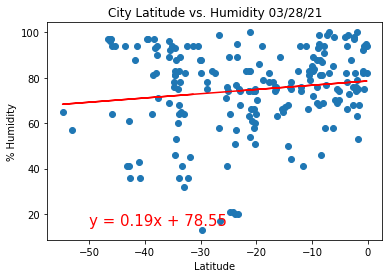

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))